In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

print("Environment ready")


Environment ready


In [2]:
import pandas as pd

# Load the dataset (make sure the file name matches exactly)
df = pd.read_csv("StudentsPerformance.csv")

# Look at basic info
print(df.shape)
print(df.head())
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nSummary statistics (numeric):")
print(df.describe())

print("\nColumns:", df.columns.tolist())


(1000, 8)
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Shape: (1000, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         

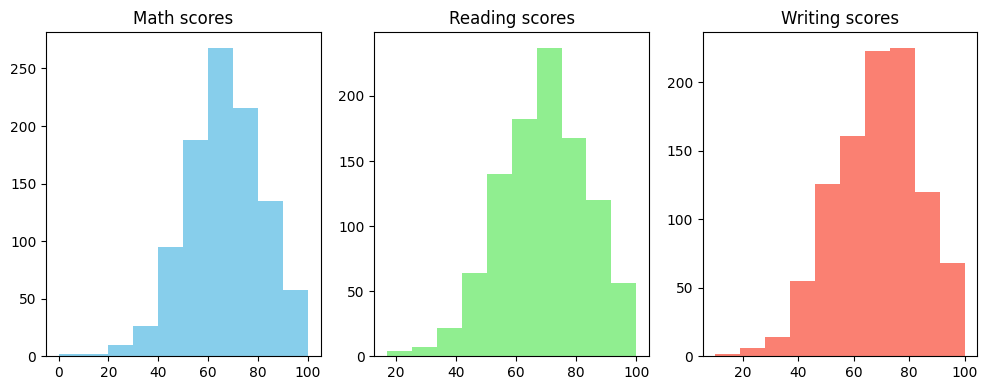

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.hist(df["math score"], bins=10, color="skyblue")
plt.title("Math scores")

plt.subplot(1, 3, 2)
plt.hist(df["reading score"], bins=10, color="lightgreen")
plt.title("Reading scores")

plt.subplot(1, 3, 3)
plt.hist(df["writing score"], bins=10, color="salmon")
plt.title("Writing scores")

plt.tight_layout()
plt.show()


In [4]:
# Create an average score column
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

print(df[["math score", "reading score", "writing score", "average_score"]].head())


   math score  reading score  writing score  average_score
0          72             72             74      72.666667
1          69             90             88      82.333333
2          90             95             93      92.666667
3          47             57             44      49.333333
4          76             78             75      76.333333


In [5]:
# Create a binary label: 1 = pass, 0 = fail
df["passed"] = (df["average_score"] >= 70).astype(int)

print(df["passed"].value_counts())
print(df[["average_score", "passed"]].head())


passed
0    541
1    459
Name: count, dtype: int64
   average_score  passed
0      72.666667       1
1      82.333333       1
2      92.666667       1
3      49.333333       0
4      76.333333       1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features (drop the label and any columns we don't want the model to see)
X = df.drop(columns=["passed", "average_score"])
y = df['pass/fail']      # if the column is literally named pass/fail

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


KeyError: "['passed', 'average_score'] not found in axis"

In [7]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        92

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForest accuracy:", acc_rf)


RandomForest accuracy: 0.98


In [9]:
from sklearn.model_selection import cross_val_score


In [11]:
rf_cv_scores = cross_val_score(rf, X_encoded, y, cv=5, scoring='accuracy')
print("Random Forest CV scores:", rf_cv_scores)
print("RF Mean CV accuracy:", rf_cv_scores.mean())
print("Logistic Regression CV:", lr_cv_scores)
print("Winner:", "RF" if rf_cv_scores.mean() > lr_cv_scores.mean() else "Logistic")


Random Forest CV scores: [0.98  0.995 0.98  0.975 0.98 ]
RF Mean CV accuracy: 0.982


NameError: name 'lr_cv_scores' is not defined

In [12]:
import joblib

# suppose your trained RF model variable is called `rf`
joblib.dump(rf, "rf_model.joblib")


['rf_model.joblib']

Confusion matrix:
 [[108   0]
 [  0  92]]


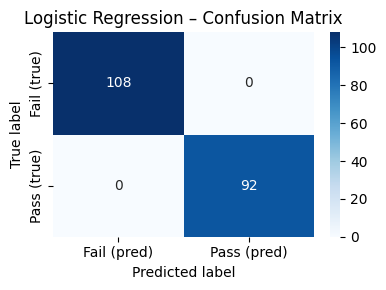

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fail (pred)", "Pass (pred)"],
            yticklabels=["Fail (true)", "Pass (true)"])
plt.title("Logistic Regression – Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()


In [15]:
# Feature names after one-hot encoding
feature_names = X_encoded.columns

# Coefficients from logistic regression (for class "passed" = 1)
coeffs = log_reg.coef_[0]

import pandas as pd

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coeffs
}).sort_values(by="coefficient", ascending=False)

print("Top positive coefficients (push towards PASS):")
print(coef_df.head(10))

print("\nTop negative coefficients (push towards FAIL):")
print(coef_df.tail(10))


Top positive coefficients (push towards PASS):
                                          feature  coefficient
2                                   writing score     1.602202
0                                      math score     1.590655
1                                   reading score     1.501905
7                          race/ethnicity_group E     0.502675
9         parental level of education_high school     0.334908
10    parental level of education_master's degree     0.207269
11       parental level of education_some college     0.191361
5                          race/ethnicity_group C     0.139938
8   parental level of education_bachelor's degree     0.097530
4                          race/ethnicity_group B     0.005355

Top negative coefficients (push towards FAIL):
                                          feature  coefficient
10    parental level of education_master's degree     0.207269
11       parental level of education_some college     0.191361
5                      

# Student Performance Predictor – Day 1

- Loaded StudentsPerformance dataset
- Performed initial EDA and plotted score distributions
- Created `average_score` and `passed` label
- Trained LogisticRegression model (Accuracy: 1.0 on test set)
- Added RandomForest model for comparison


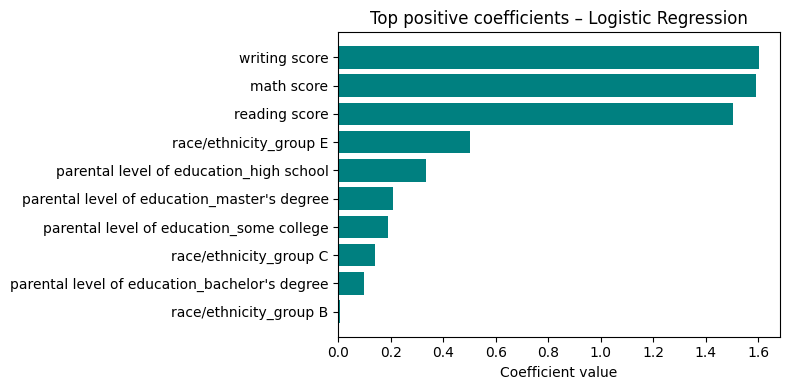

## Model comparison (Day 1)

- LogisticRegression accuracy: 1.0  
- RandomForest accuracy: 1.0  
- This dataset is easy to separate; next steps:
  - Add cross-validation
  - Look at feature importances / coefficients
  - Improve documentation in README


In [16]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_encoded, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Std CV accuracy:", cv_scores.std())


Cross-validation accuracy scores: [1.    1.    1.    0.995 1.   ]
Mean CV accuracy: 0.999
Std CV accuracy: 0.0020000000000000018


In [18]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load data (adjust path/variable if you already have df)
df = pd.read_csv("StudentsPerformance.csv")  # or reuse your existing df

# 1. Features: ONLY the three scores
X = df[['math score', 'reading score', 'writing score']]

# 2. Target: use your existing target column name
# Example: if you created a binary column called "pass_fail"
y = df['pass_fail']   # <-- change to your actual target column name

# 3. Train RF
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# 4. Save model
joblib.dump(rf, "rf_model.joblib")
print("Saved new RF model with 3 score features.")


KeyError: 'pass_fail'

In [26]:
print(df.columns.tolist())


['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'average_score', 'passed']


In [25]:
# Start from original df
df = pd.read_csv("StudentsPerformance.csv")

# Create average score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Create binary label: pass if average >= 60
df['passed'] = (df['average_score'] >= 60).astype(int)   # 1 = pass, 0 = fail

print(df[['math score', 'reading score', 'writing score', 'average_score', 'passed']].head())


   math score  reading score  writing score  average_score  passed
0          72             72             74      72.666667       1
1          69             90             88      82.333333       1
2          90             95             93      92.666667       1
3          47             57             44      49.333333       0
4          76             78             75      76.333333       1


In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load original CSV
df = pd.read_csv("StudentsPerformance.csv")

# Features: only the three scores
X = df[['math score', 'reading score', 'writing score']]

# Target: use the existing label column
y = df['pass/fail']   # exactly this, as in your screenshot

# Train simple RF
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Save model
joblib.dump(rf, "rf_model.joblib")
print("Saved RF model with 3 score features and target = pass/fail")


KeyError: 'pass/fail'

In [2]:
import pandas as pd

# Always start from raw CSV here
df = pd.read_csv("StudentsPerformance.csv")

# Create average score and passed label
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['passed'] = (df['average_score'] >= 60).astype(int)  # 1 = pass, 0 = fail

print(df[['math score', 'reading score', 'writing score', 'average_score', 'passed']].head())
print(df.columns.tolist())


   math score  reading score  writing score  average_score  passed
0          72             72             74      72.666667       1
1          69             90             88      82.333333       1
2          90             95             93      92.666667       1
3          47             57             44      49.333333       0
4          76             78             75      76.333333       1
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'average_score', 'passed']


In [3]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Features: only scores
X = df[['math score', 'reading score', 'writing score']]

# Target: the new binary label
y = df['passed']   # 1 or 0

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

joblib.dump(rf, "rf_model.joblib")
print("Saved RF model with target = passed (1/0).")


Saved RF model with target = passed (1/0).


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Features: three scores
X = df[['math score', 'reading score', 'writing score']]
y = df['passed']   # 1 = pass, 0 = fail


In [5]:
# Logistic Regression (baseline)
log_clf = LogisticRegression(max_iter=1000)
log_cv_scores = cross_val_score(log_clf, X, y, cv=5)  # 5-fold CV
print("Logistic Regression CV scores:", log_cv_scores)
print("Logistic Regression mean acc:", log_cv_scores.mean())

# Random Forest (current simple model)
rf_clf = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print("Random Forest CV scores:", rf_cv_scores)
print("Random Forest mean acc:", rf_cv_scores.mean())

winner = "Random Forest" if rf_cv_scores.mean() > log_cv_scores.mean() else "Logistic Regression"
print("Winner (3-score features):", winner)


Logistic Regression CV scores: [1. 1. 1. 1. 1.]
Logistic Regression mean acc: 1.0
Random Forest CV scores: [0.99  0.97  0.995 0.99  0.995]
Random Forest mean acc: 0.9880000000000001
Winner (3-score features): Logistic Regression


In [6]:
# Try a slightly larger forest and limited depth
rf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_tuned_cv = cross_val_score(rf_tuned, X, y, cv=5)
print("Tuned RF CV scores:", rf_tuned_cv)
print("Tuned RF mean acc:", rf_tuned_cv.mean())


Tuned RF CV scores: [0.995 0.97  0.995 0.99  0.995]
Tuned RF mean acc: 0.9890000000000001


In [7]:
rf_tuned.fit(X, y)
joblib.dump(rf_tuned, "rf_model.joblib")
print("Saved tuned RF model to rf_model.joblib")


Saved tuned RF model to rf_model.joblib
